# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
<ul>    
<li>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
<li>balcony — число балконов
<li>ceiling_height — высота потолков (м)
<li>cityCenters_nearest — расстояние до центра города (м)
<li>days_exposition — сколько дней было размещено объявление (от публикации до снятия)
<li>first_day_exposition — дата публикации
<li>floor — этаж
<li>floors_total — всего этажей в доме
<li>is_apartment — апартаменты (булев тип)
<li>kitchen_area — площадь кухни в квадратных метрах (м²)
<li>last_price — цена на момент снятия с публикации
<li>living_area — жилая площадь в квадратных метрах(м²)
<li>locality_name — название населённого пункта
<li>open_plan — свободная планировка (булев тип)
<li>parks_around3000 — число парков в радиусе 3 км
<li>parks_nearest — расстояние до ближайшего парка (м)
<li>ponds_around3000 — число водоёмов в радиусе 3 км
<li>ponds_nearest — расстояние до ближайшего водоёма (м)
<li>rooms — число комнат
<li>studio — квартира-студия (булев тип)
<li>total_area — площадь квартиры в квадратных метрах (м²)
<li>total_images — число фотографий квартиры в объявлении</ul>

## Изучение данных из файла

In [1]:
import pandas as pd
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.shape

(23699, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод: При первом взгляде видны пропущенные значения.

## Предобработка данных

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах пропущенные значения. В некоторых столбцах, например в 'parks_nearest', таких данных больше половины. Надо разбираться с каждым столбцом.  

Начну с высоты потолков - 'ceiling_height'. 9195 пропущенных значений.

На первый взгляд не видно каких-либо закономерностей между высотой потолка и другими значениями. Предположим и проверим зависимость высоты потолка от этажности здания 'floors_total' и от площади квартиры 'total_area'.

In [5]:
df['ceiling_height'].corr(df['floors_total'])

-0.028731894622727384

In [6]:
df['ceiling_height'].corr(df['total_area'])

0.09549044852366358

Посмотрим как высота потолка коррелирует с другимим величинами.

In [7]:
df.corr()['ceiling_height']

total_images          -0.001987
last_price             0.085430
total_area             0.095490
rooms                  0.054457
ceiling_height         1.000000
floors_total          -0.028732
living_area            0.090650
floor                 -0.011798
studio                 0.001674
open_plan              0.042777
kitchen_area           0.087641
balcony                0.040523
airports_nearest      -0.023947
cityCenters_nearest   -0.091689
parks_around3000       0.065915
parks_nearest         -0.019167
ponds_around3000       0.078209
ponds_nearest         -0.059090
days_exposition        0.019091
Name: ceiling_height, dtype: float64

Предположения не оправдались. Значения не коррелируют между собой. Вероятно, данные просто не вносились анкетируемыми. Посмотрим основные статистические характеристики.

In [8]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Заполняю пропущенные значения медианным.

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [10]:
df['ceiling_height'].isna().sum()

0

Пропущенные значения заменены.

Далее этажность здания - 'floors_total'. 86 пропущенных значений. Изучу срез данных пропущенных значений.

In [11]:
df[df['floors_total'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [12]:
df.corr()['floors_total']

total_images           0.010427
last_price            -0.006984
total_area            -0.075774
rooms                 -0.228215
ceiling_height        -0.026843
floors_total           1.000000
living_area           -0.169311
floor                  0.678059
studio                 0.070151
open_plan              0.050791
kitchen_area           0.163944
balcony                0.194065
airports_nearest       0.108288
cityCenters_nearest    0.019774
parks_around3000      -0.252833
parks_nearest          0.097527
ponds_around3000      -0.122735
ponds_nearest          0.038864
days_exposition       -0.052234
Name: floors_total, dtype: float64

Этажность не коррелирует ни с какими значениями. Вероятно, данные просто не вносились анкетируемыми. Подставлю вместо пропущенных значений нули. 

In [13]:
df['floors_total'] = df['floors_total'].fillna(0)

Далее жилая площадь - 'living_area'. 1903 пропущенных значений. Сразу проверю возможные корреляции.

In [14]:
df.corr()['living_area']

total_images           0.104780
last_price             0.566492
total_area             0.939537
rooms                  0.845977
ceiling_height         0.078623
floors_total          -0.168260
living_area            1.000000
floor                 -0.097210
studio                -0.056231
open_plan             -0.033711
kitchen_area           0.428674
balcony                0.018849
airports_nearest      -0.057912
cityCenters_nearest   -0.231368
parks_around3000       0.184453
parks_nearest         -0.050167
ponds_around3000       0.148933
ponds_nearest         -0.081674
days_exposition        0.142454
Name: living_area, dtype: float64

Видна сильная корреляция с общей площадью 'total_area', что естественно - при увеличении жилой площади увеличится и общая. Я вычислю медиану жилой площади для каждой общей и заполню этими значениями отсутствующие.

In [15]:
for area in df['total_area'].unique():
    median = df.loc[df['total_area'] == area, 'living_area'].median()
    df.loc[(df['living_area'].isna()) & (df['total_area'] == area), 'living_area'] = median

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [16]:
df['living_area'].isna().sum()

143

Осталось 143 пропущенных значения, что составляет всего 0.6% от всех данных. Это значения, которые встречаются по одному разу. Можно удалить их, но я, все же, оставлю их как есть.

Иду дальше. Значения в is_apartment - является ли квартира апартаментами, занесены как True, False или NaN, но отнесены к типу object. Это явное несоответствие типу и его надо исправить. Но перед этим я избавлюсь от пропущенных значений, заменяя их на False, предположив, что анкетируемые просто не знали, что такое апартаменты, проживая в квартире.

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

In [18]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [19]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'].dtypes

dtype('bool')

Изменения внесены верно.

In [20]:
df['kitchen_area'].isna().sum()

2278

Следующий столбец площадь кухни - kitchen_area. 2278 пропущенных значений. Проверим корреляцию с другими параметрами.

In [21]:
df.corr()['kitchen_area']

total_images           0.104756
last_price             0.519869
total_area             0.609121
rooms                  0.269945
ceiling_height         0.071350
floors_total           0.161820
living_area            0.429053
floor                  0.135531
is_apartment           0.049034
studio                      NaN
open_plan                   NaN
kitchen_area           1.000000
balcony                0.098634
airports_nearest       0.008200
cityCenters_nearest   -0.190049
parks_around3000       0.087503
parks_nearest          0.029641
ponds_around3000       0.150148
ponds_nearest         -0.105223
days_exposition        0.100586
Name: kitchen_area, dtype: float64

Видна средняя корреляция с общей площадью. Возьмем это за основу для вычислений. Я вычислю медиану площади кухни для каждой общей и заполню этими значениями отсутствующие.

In [22]:
for area in df['total_area'].unique():
    median = df.loc[df['total_area'] == area, 'kitchen_area'].median()
    df.loc[(df['kitchen_area'].isna()) & (df['total_area'] == area), 'kitchen_area'] = median

In [23]:
df['kitchen_area'].isna().sum()

205

Осталось 205 пропущенных значения, что составляет всего 0.86% от всех данных. Это значения, которые встречаются по одному разу. Можно удалить их, но я, все же, оставлю их как есть.

In [24]:
df['balcony'].isna().sum()

11519

Далее идут данные о количестве балконов - balcony. Пропущенных значений очень много - 11519. Предположу, что скорее всего анкетируемый не заполнял этот параметр при отсутствии балкона. Поэтому заменю такие значения на 0.

In [25]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Пропущенные значении заменены.

Далее изучим 49 пропусков в именах населенных пунктах - locality_name.

Поставлю заглушку на пропущенные значения, чтобы можно было дальше работать.

In [26]:
df['locality_name'] = df['locality_name'].fillna('неизвестно')
df['locality_name'].isna().sum()

0

In [27]:
len(df['locality_name'].unique())

365

Найдено 365 уникальных значений. Возможно, одинаковые названия внесены в различном написании. Для приведения названий к единому виду использую функцию. 

In [28]:
def str_good (row):
    row=row.split(' ')
    
    return(row[-1])

In [29]:
df['locality_name_correct'] = df['locality_name'].apply(str_good)

In [30]:
len(df['locality_name_correct'].unique())

295

Теперь уникальных имен стало на 70 меньше.

In [31]:
df['locality_name_correct'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Бор', 'Бугры', 'Будогощь', 'Ваганово', 'Важины',
       'Вартемяги', 'Верево', 'Вещево', 'Виллози', 'Вознесенье',
       'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское',
       'Волосово', 'Волхов', 'Вруда', 'Всеволожск', 'Выборг', 'Вырица',
       'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово',
       'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка',
       'Гончарово', 'Горбунки', 'Горка', 'Гостилицы', 'Грива', 'Громово',
       'Девяткино', 'Дзержинского', 'Долина', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Ижора', 'Извара', 'Ильичёво', 'Иссад',
       'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка',
       'Кара

Просмотрев весь, список нахожу в конце населенный пункт 'километр'. Устанавливаю, что это 'Платформа 69-й километр'. Исправляю.

In [32]:
df['locality_name_correct'] = df['locality_name_correct'].where(df.locality_name_correct != 'километр', 'Платформа 69-й километр')

Теперь названия корректные. Остались названия - заглушки. С ними ничего делать не буду, т.к. названия не будут участвовать в исследовании.

In [33]:
df.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                143
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area               205
balcony                      0
locality_name                0
airports_nearest          5542
cityCenters_nearest       5519
parks_around3000          5518
parks_nearest            15620
ponds_around3000          5518
ponds_nearest            14589
days_exposition           3181
locality_name_correct        0
dtype: int64

Теперь идет целая когорта данных различных географических показателей, в которых много пропущенных значений. Я не могу заменить пропущенные значения в этих столбцах т.к. не знаю географических координат квартир.

В столбце days_exposition тоже есть пропущенные значения, которые я заменю на медианные.

In [34]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

Теперь проверю типы данных в сете.

In [35]:
df.dtypes

total_images               int64
last_price               float64
total_area               float64
first_day_exposition      object
rooms                      int64
ceiling_height           float64
floors_total             float64
living_area              float64
floor                      int64
is_apartment                bool
studio                      bool
open_plan                   bool
kitchen_area             float64
balcony                  float64
locality_name             object
airports_nearest         float64
cityCenters_nearest      float64
parks_around3000         float64
parks_nearest            float64
ponds_around3000         float64
ponds_nearest            float64
days_exposition          float64
locality_name_correct     object
dtype: object

Данные в first_day_exposition — записаны в виде datetime (причем везде одинаковое время), но отмечены как тип object. Это явное несоответствие исправляю.

In [36]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Значения в floors_total имеют тип float, но этажность не может быть нецелым числом. Исправляю на тип int.

In [37]:
df['floors_total'] = df['floors_total'].astype('int')

Значения в balcony имеют тип float, но число балконов не может быть нецелым числом.

In [38]:
df['balcony'] = df['balcony'].astype('int')

Значения в days_exposition имеют тип float, но количество дней не может быть нецелым числом.  Логично было бы исправить на тип int. Но из-за наличия пропущенных значений это сделать не получится. Тоже относится к столбцам 'parks_around3000' и 'ponds_around3000 ' 

## Расчёты и добавление результатов в таблицу

Посчитаю и добавлю в таблицу:
1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

1.

In [39]:
df['cost_per_metr'] = (df['last_price'] / df['total_area']).round(2)

2.

In [40]:
df['first_day_exposition_day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday_name
df['first_day_exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month_name()
df['first_day_exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

3.

In [41]:
df['floor_category'] = df['floor']

In [42]:
for x in range(df.shape[0]):
    if df.iloc[x, 8] == 1: df.iloc[x, 27] = 'первый'
    elif df.iloc[x, 6] == df.iloc[x, 8]: df.iloc[x, 27] = 'последний'
    else: df.iloc[x, 27] = 'другой'

4.

In [43]:
df['living_total_ratio'] = (df['living_area'] / df['total_area']).round(2)

In [44]:
df['kitchen_total_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

In [45]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_correct,cost_per_metr,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_ratio,kitchen_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95.0,Санкт-Петербург,120370.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81.0,Шушары,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,Санкт-Петербург,92785.71,Thursday,August,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,95.0,9,False,...,234.0,424.0,Санкт-Петербург,408176.10,Friday,July,2015,другой,0.60,0.09
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,Санкт-Петербург,100000.00,Tuesday,June,2018,другой,0.32,0.41


## Исследовательский анализ данных

<ol>Последовательно выполню следующие пункты:
    
<li>Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.</li>
<li>Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</li>
<li>Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.</li>
<li>Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.</li>
<li>Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.</li>
<li>Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.</li>
<li>Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?</li>
</ol>    

1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучу распределение общей площади квартир.

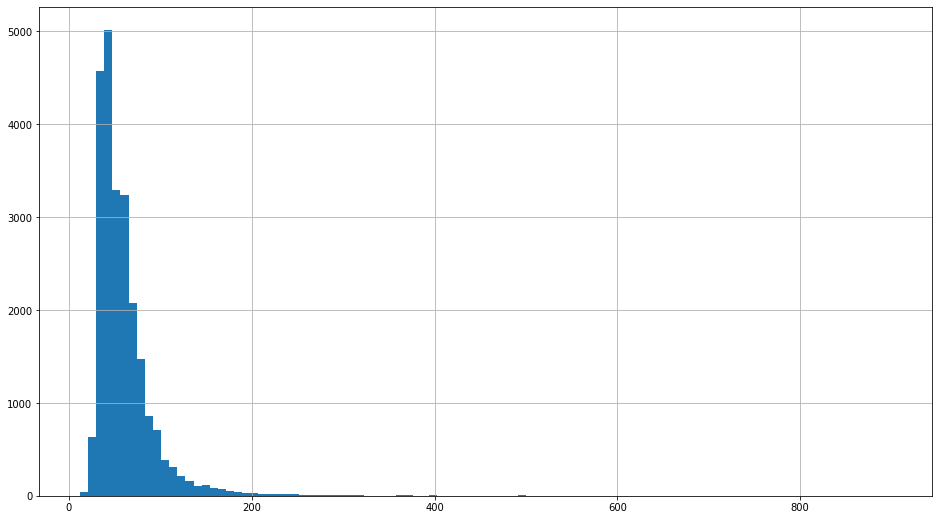

In [46]:
df['total_area'].hist(bins=100, figsize=(16,9))

Похоже на распределение Пуассона. Квартир, площадью свыше 200 кв.м. мало, рассмотрю их поближе.

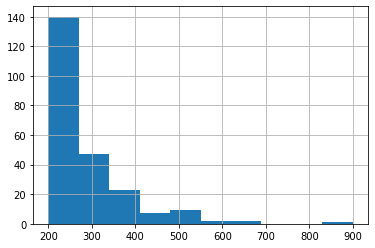

In [47]:
df['total_area'].hist(range=(200,900))

In [48]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Виден выброс в виде квартиры, площадью 900 кв.м. Удалю такое наблюдение.

In [49]:
df[df['total_area']==900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_correct,cost_per_metr,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_ratio,kitchen_total_ratio
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,318.0,106.0,Санкт-Петербург,466666.67,Wednesday,December,2017,последний,0.46,0.12


In [50]:
df=df.drop(index=[19540])

In [51]:
df[df['total_area']>200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_correct,cost_per_metr,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_ratio,kitchen_total_ratio
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.0,3,False,...,366.0,62.0,Санкт-Петербург,302839.12,Friday,July,2017,последний,0.58,NaN
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.5,7,False,...,616.0,578.0,Санкт-Петербург,237499.11,Thursday,June,2015,другой,0.57,0.08
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.0,4,False,...,620.0,14.0,Санкт-Петербург,439814.81,Tuesday,December,2017,другой,0.40,0.36
509,5,90000000.0,225.0,2016-06-26,6,2.65,4,134.0,2,False,...,519.0,416.0,Санкт-Петербург,400000.00,Sunday,June,2016,другой,0.60,0.09
521,20,25717300.0,230.1,2015-01-21,3,2.65,3,130.0,1,False,...,278.0,1441.0,Пушкин,111765.75,Wednesday,January,2015,первый,0.56,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4,181.8,2,False,...,40.0,42.0,Санкт-Петербург,103361.34,Sunday,September,2018,другой,0.61,0.07
23281,20,24800000.0,231.2,2015-01-21,6,3.10,5,99.8,4,False,...,795.0,95.0,Санкт-Петербург,107266.44,Wednesday,January,2015,другой,0.43,0.12
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4,82.4,4,False,...,NaN,95.0,Санкт-Петербург,160000.00,Friday,March,2019,последний,0.38,0.19
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5,151.4,5,False,...,30.0,299.0,Санкт-Петербург,140845.07,Thursday,September,2017,последний,0.71,0.14


Видно, что квартир свыше 200 кв.м. всего 223 шт, что составляет меньше 1 % от общего. Удалю такие наблюдения.

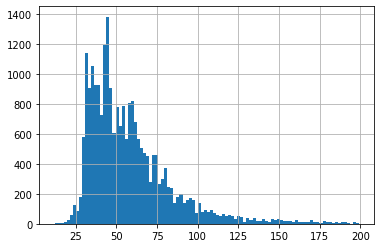

In [52]:
df=df.query('total_area<200')
df['total_area'].hist(bins=100)

Видны маленькие значения слева от пика. Рассмотрю их.

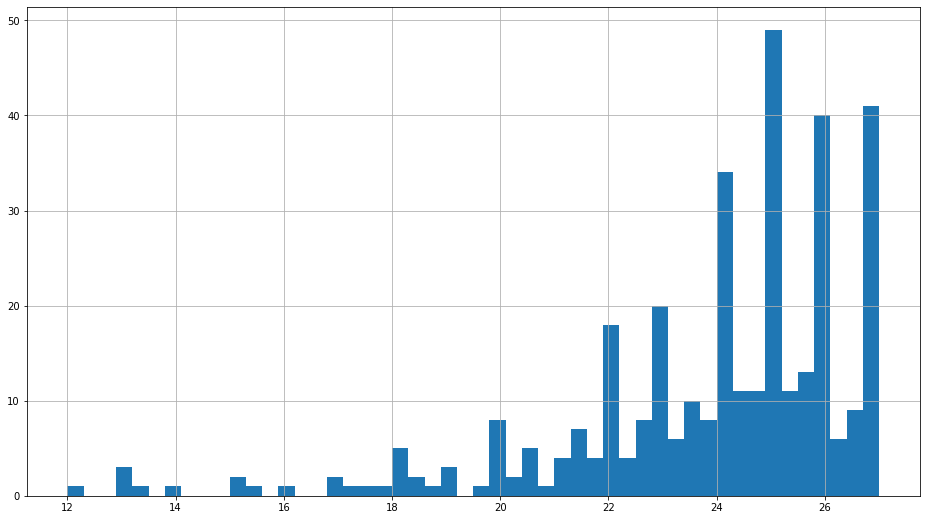

In [53]:
df['total_area'].hist(bins=50, range=(12,27), figsize=(16,9))

Таких значений всего 1,3%. Удалю их.

In [54]:
df=df.query('total_area>27')

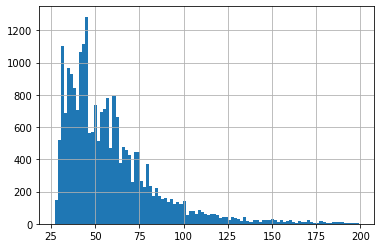

In [55]:
df['total_area'].hist(bins=100)

Видно распределение значений с несколькими пиками. 

Изучу распределение цены квартир. Для удобства переведу цену квартир из рублей в миллионы рублей.

In [56]:
df['last_price'] = df['last_price'] / 1000000

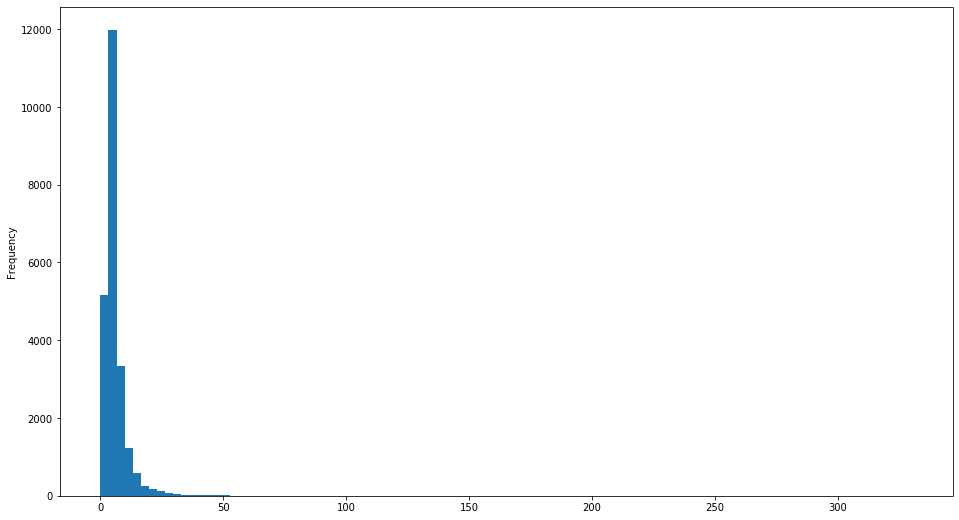

In [57]:
df['last_price'].plot(bins=100, kind='hist', figsize=(16,9))

Виден хвост цены больше 50 млн.руб.

In [58]:
df[df['last_price']>50]['last_price'].count()

49

Таких наблюдений очень мало. Всего 49. Отрезаю их.

In [59]:
df=df.query('last_price<50')

In [60]:
df['last_price'].describe()

count    23056.000000
mean         5.902838
std          4.592879
min          0.012190
25%          3.459736
50%          4.650000
75%          6.700000
max         49.900000
Name: last_price, dtype: float64

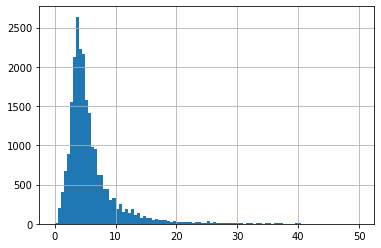

In [61]:
df['last_price'].hist(bins=100, range=(0,50))

В стоимости квартир наблюдаем нормальное распределение значений.

Далее изучу распределенние количества комнат.

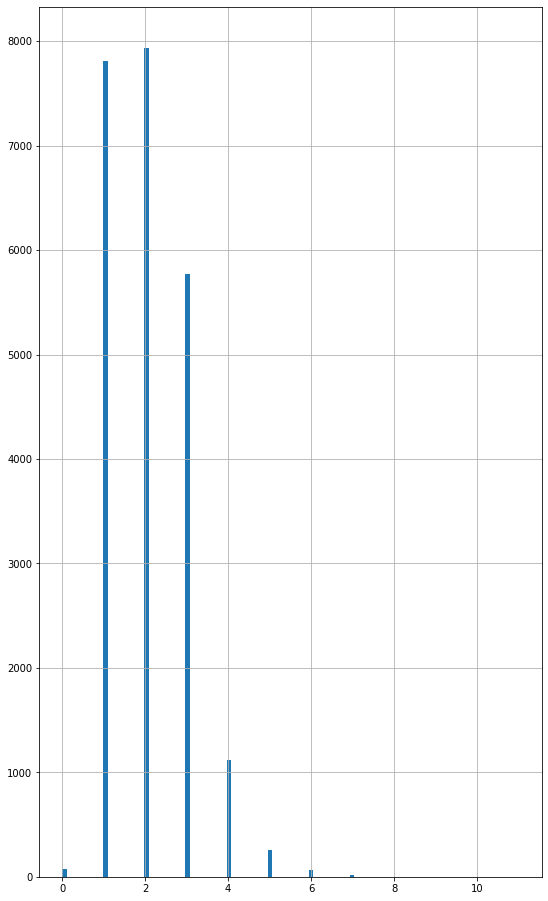

In [62]:
df['rooms'].hist(bins=100, figsize=(9,16))

In [63]:
df['rooms'].value_counts()

2     7931
1     7809
3     5772
4     1120
5      260
0       79
6       61
7       20
11       2
8        2
Name: rooms, dtype: int64

Здесь видно, что основная масса квартир содержат до 3 комнат. 79 квартир без комнат непонятно. Надо рассмотреть. Но сначала удалю выбросы, где 8 и 11 комнат.

In [64]:
df=df.query('rooms<8')

In [65]:
df.query('(rooms==0) & (open_plan==True)')['rooms'].count()

25

In [66]:
df.query('(rooms==0) & (studio==True)')['rooms'].count()

54

Установлено, что треть таких квартир это квартиры со свободной планировкой и две трети это квартиры-студии. Эти данные не будут использоваться в дльнейших расчетах, поэтому отрезаю их.

Напоследок изучу высоту потолков.

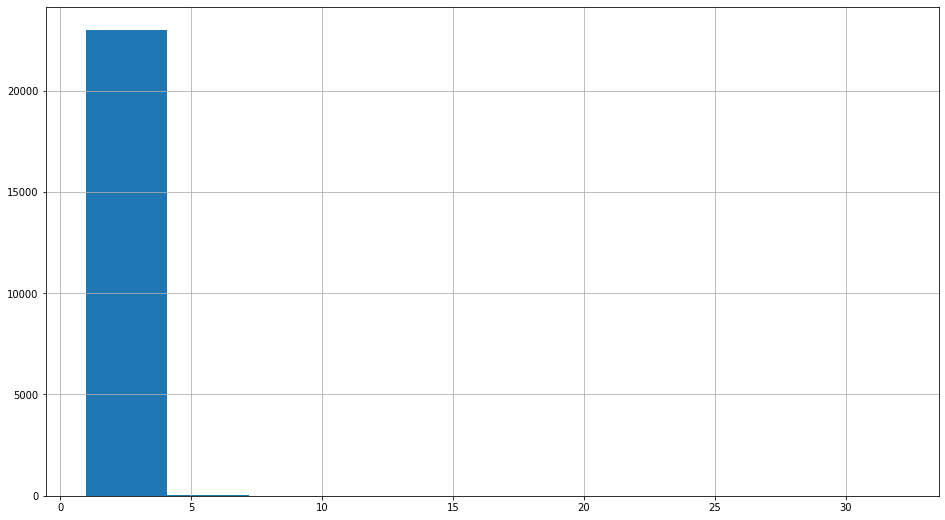

In [67]:
df['ceiling_height'].hist(figsize=(16,9))

In [68]:
df['ceiling_height'].describe()

count    23052.000000
mean         2.714755
std          0.749466
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

Видно, что самая встречающаяся высота потолков до 3 метров. Значения, свыше 8 метров отрезаю изза их малочисленности. Как раз туда попадет и выброс в 30 метров.

In [69]:
df=df.query('ceiling_height<8')

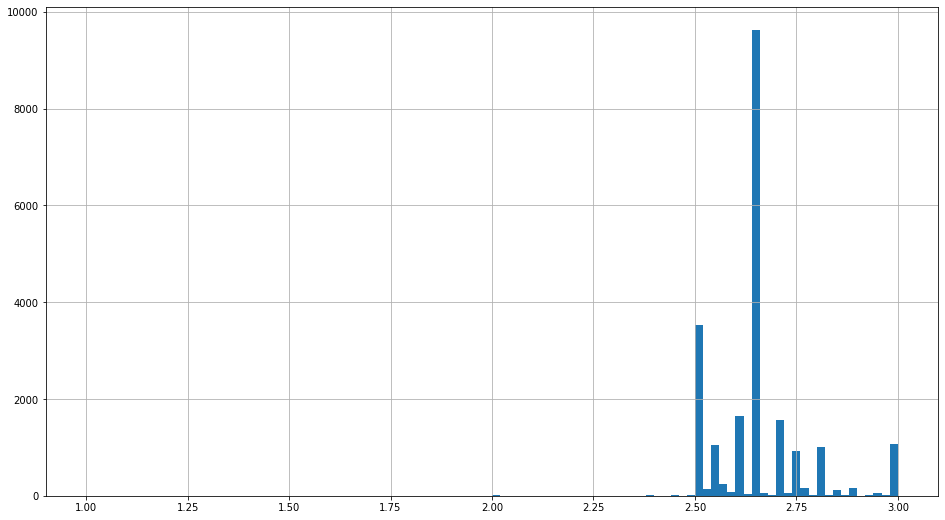

In [70]:
df['ceiling_height'].hist(bins=100, figsize=(16,9), range=(1,3))

Высота потолка меньше 2,5 метров маловероятно. Уберу такие значения вместе с выбросом в 1 метр.

In [71]:
df=df.query('ceiling_height>=2.5')

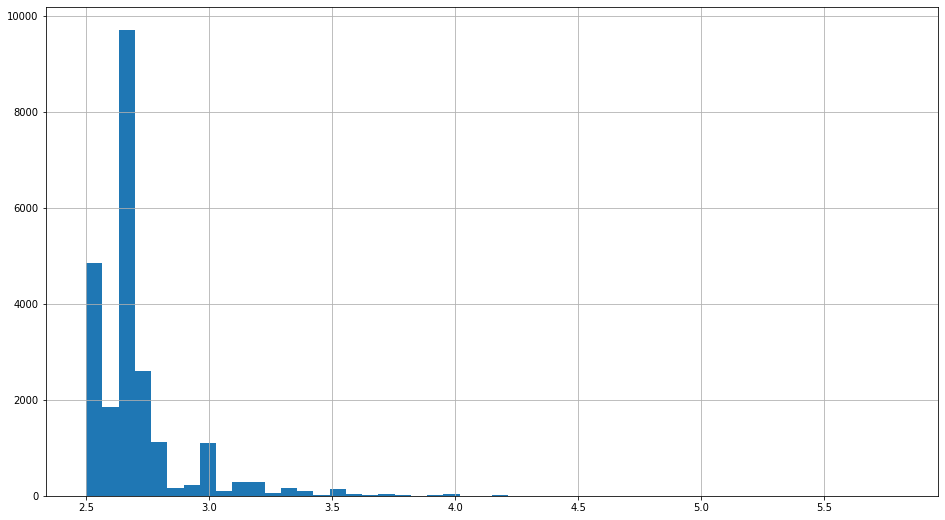

In [72]:
df['ceiling_height'].hist(bins=50, figsize=(16,9))

2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

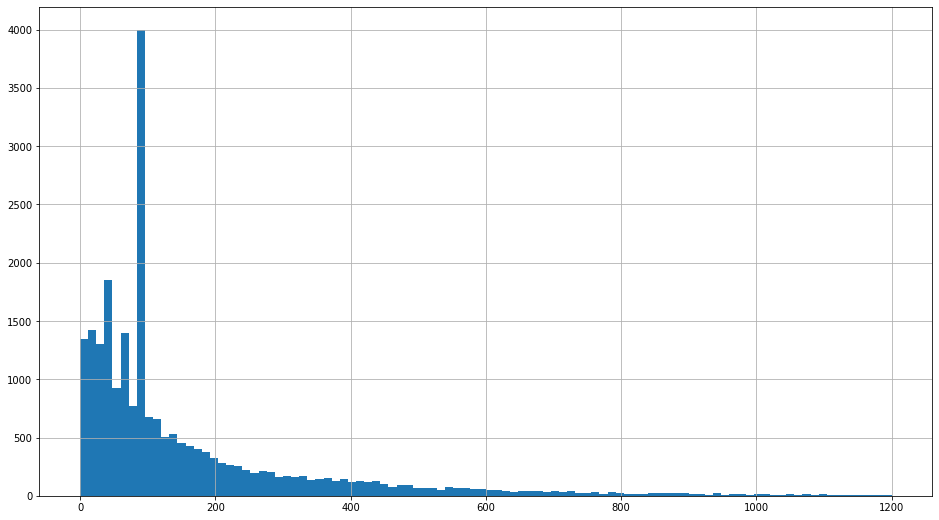

In [73]:
df['days_exposition'].hist(bins=100, range=(0,1200), figsize=(16,9))

Виден большой пик значений. Каке то данные сильно выходят за нормальные границы.

In [74]:
df['days_exposition'].value_counts()

95.0      3138
45.0       849
60.0       533
7.0        227
30.0       204
          ... 
996.0        1
951.0        1
693.0        1
1255.0       1
773.0        1
Name: days_exposition, Length: 1132, dtype: int64

Этот пик приходится на 95 дней продажи. Изучу срез данных в этот день.

In [75]:
df[df['days_exposition']==95]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_correct,cost_per_metr,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_ratio,kitchen_total_ratio
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95.0,Санкт-Петербург,120370.37,Thursday,March,2019,другой,0.47,0.23
7,5,7.915,71.60,2019-04-18,2,2.65,24,44.3,22,False,...,NaN,95.0,Санкт-Петербург,110544.69,Thursday,April,2019,другой,0.62,0.26
44,13,5.350,40.00,2018-11-18,1,2.65,22,18.0,3,False,...,1152.0,95.0,Санкт-Петербург,133750.00,Sunday,November,2018,другой,0.45,0.25
45,17,5.200,50.60,2018-12-02,2,2.65,9,30.3,7,False,...,NaN,95.0,Санкт-Петербург,102766.80,Sunday,December,2018,другой,0.60,0.14
46,17,6.600,52.10,2019-01-31,2,2.60,24,29.7,9,False,...,NaN,95.0,Санкт-Петербург,126679.46,Thursday,January,2019,другой,0.57,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21.400,145.00,2018-11-02,4,3.00,26,71.4,17,False,...,NaN,95.0,Санкт-Петербург,147586.21,Friday,November,2018,другой,0.49,0.11
23685,15,2.490,31.00,2019-01-24,1,2.50,5,17.3,5,False,...,NaN,95.0,Ломоносов,80322.58,Thursday,January,2019,последний,0.56,0.18
23694,9,9.700,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,95.0,Санкт-Петербург,72490.85,Tuesday,March,2017,другой,0.55,0.10
23696,18,2.500,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,95.0,Рождествено,44091.71,Sunday,February,2018,первый,0.52,0.15


Не видно никаких зацепок. 95 дней соответствует медиане.

In [76]:
df['days_exposition'].describe()

count    22954.000000
mean       169.043086
std        205.900955
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Считаю, что меньше первого квартиля - это быстрые продажи. В межквартильный размах входят стандартные продажи. Значения выше третьего квартиля - долгие продажи.

3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

<li>total_area - площадь квартиры. Я убрал редкие значение больше 200 и меньше 27 кв.м. Удалил выброс в 900 кв.м.
<li>last_price - продажная цена. Я убрал редкие значения цены больше 50 млн. руб.
<li>rooms - число комнат. Я удалил выбросы в 8 и 11 комнат. Потом убрал редкие значения с нулевым количеством комнат.
<li>ceiling_height - высота потолка. Я убрал выбросы в 1 и 32 метра и оставил данные с высотой в пределах 2,5-8 метров.

После предобработки и исследования входных данных я убрал 3% мусорных значений.

4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Для этого выясним корреляцию данных между собой.

In [77]:
newdf = pd.DataFrame(df, columns=['last_price', 'total_area', 'rooms', 'cityCenters_nearest'])

In [78]:
newdf.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.766233,0.464393,-0.339806
total_area,0.766233,1.000000,0.785539,-0.239700
rooms,0.464393,0.785539,1.000000,-0.166468
cityCenters_nearest,-0.339806,-0.239700,-0.166468,1.000000


Видна корреляция выше среднего у следующих пар значений: площадь - количество комнат и цена-площадь. Эти корреляции вполне естественны. Чем больше комнат, тем больше площадь квартиры, а чем больше площадь тем квартира дороже. Поэтому цена сильно зависит от количества комнат и площади. И слабо зависит от расстояния до центра города.

Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Сделаю сводную таблицу.

In [79]:
df1 = df.pivot_table(index='floor_category', values='last_price', aggfunc='median')
df1.sort_values(by='last_price')


,last_price
floor_category,
первый,3.90
последний,4.30
другой,4.85


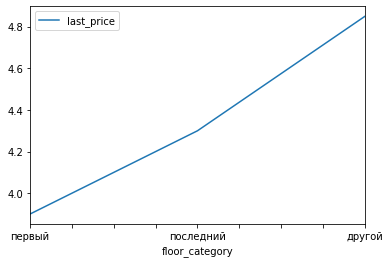

In [80]:
df1.sort_values(by='last_price').plot()

Видно, что цена зависима от этажа квартиры. Цены в целом ниже для квартир на первом и последнем этажах. Остальные этажи наиболее дорогие.

Также изучите зависимость от даты размещения: дня недели, месяца и года. Сделаю сводные таблицы.

In [81]:
df2 = df.pivot_table(index='first_day_exposition_day', values='last_price', aggfunc='median')
df3 = df.pivot_table(index='first_day_exposition_month', values='last_price', aggfunc='median')
df4 = df.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc='median')

In [82]:
df2.sort_values(by='last_price')

,last_price
first_day_exposition_day,
Saturday,4.5500
Sunday,4.5525
Friday,4.6000
Monday,4.6500
Thursday,4.6500
Wednesday,4.7000
Tuesday,4.7500


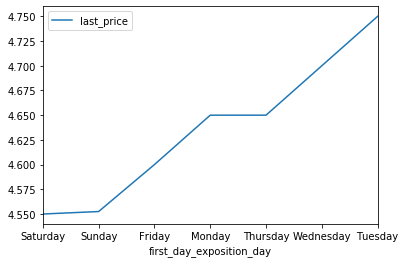

In [83]:
df2.sort_values(by='last_price').plot()

В целом видно, что цена начинает повышаться с начала недели. На выходных цена самая низкая.

In [84]:
df3.sort_values(by='last_price')

,last_price
first_day_exposition_month,
June,4.400
May,4.550
October,4.590
August,4.600
January,4.600
February,4.650
July,4.675
December,4.700
March,4.700


В целом к концу года цена выше.

In [85]:
df4.sort_values(by='last_price')

,last_price
first_day_exposition_year,
2017,4.500
2016,4.550
2018,4.600
2019,5.065
2015,5.250
2014,7.500


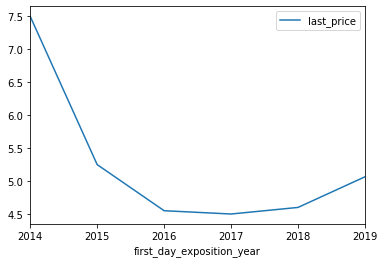

In [86]:
df4.plot()

Начиная с 2014 года цена падает до 2017 года и после начинается подъем.

5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [87]:
df_locality = df.groupby('locality_name_correct').agg({'cost_per_metr':'mean'}).sort_values(by='cost_per_metr', ascending=False).head(10)
df_locality

,cost_per_metr
locality_name_correct,
Зеленогорск,115122.799583
Санкт-Петербург,111952.856527
Репино,104238.612500
Пушкин,103099.210444
Сестрорецк,101912.339286
Нос,100660.816667
Мистолово,98549.977273
Левашово,96997.690000
Кудрово,94569.055324


В этом ТОР-10 видно, что самые дорогие квартиры находятся в Зеленогорске, а дешевые в Кудрово.

6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Делаю срез данных для наблюдений в Санкт-Петербурге.

In [88]:
df_area_in_SP = df.query('locality_name_correct == "Санкт-Петербург"')

In [89]:
df_area_in_SP = pd.DataFrame(df_area_in_SP, columns=['last_price', 'cityCenters_nearest']) 

Перевожу расстояние до центра в километры.

In [90]:
df_area_in_SP['cityCenters_nearest'] = df_area_in_SP['cityCenters_nearest'] / 1000

Сделаю сводную таблицу для зависимости цена-расстояние от центра.

In [91]:
df_area_in_SP = df_area_in_SP.groupby('cityCenters_nearest', as_index=False).agg({'last_price':'median'})

In [92]:
df_area_in_SP

,cityCenters_nearest,last_price
0,0.181,31.099
1,0.208,5.800
2,0.215,10.990
3,0.287,9.590
4,0.291,11.500
...,...,...
6148,28.644,4.775
6149,28.806,4.370
6150,29.263,4.850
6151,29.343,4.200


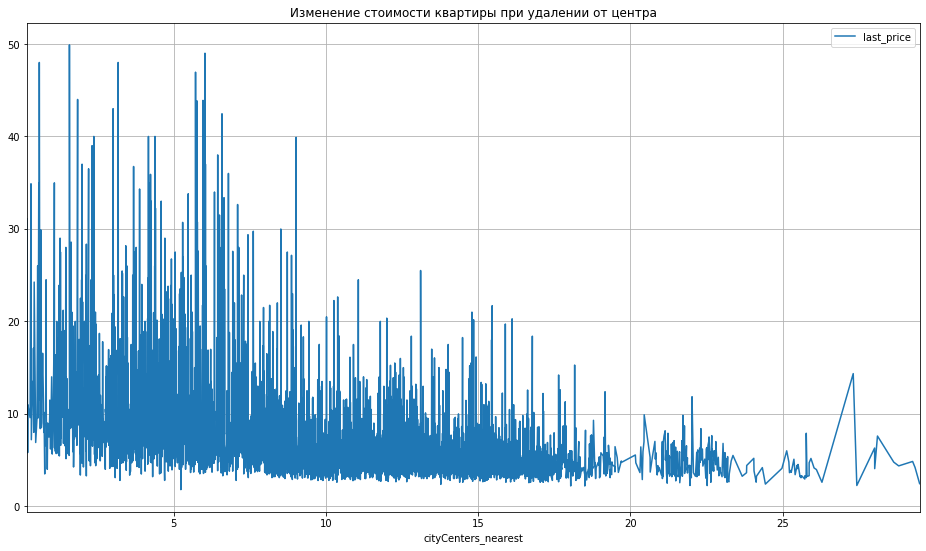

In [93]:
df_area_in_SP.plot(x='cityCenters_nearest', y='last_price', title='Изменение стоимости квартиры при удалении от центра', grid=True, figsize=(16,9))

После 10 км начинается снижение цены, поэтому обозначим границу центральной зоны в 10 км.
В целом видно, что цена снижается по мере удаленности от центра.

In [94]:
df_area_in_SP.corr()

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.461401
last_price,-0.461401,1.000000


Видно, что корреляция средняя.

7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Сделаю срез данных с заданныи параметрами.

In [95]:
df_centr_area = pd.DataFrame(df.query('locality_name_correct == "Санкт-Петербург"'), columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'cityCenters_nearest',  'first_day_exposition_day','first_day_exposition_month', 'first_day_exposition_year'])

In [96]:
df_centr_area['cityCenters_nearest'] = df_centr_area['cityCenters_nearest'] / 1000

In [97]:
df_centr_area = df_centr_area.query('cityCenters_nearest<=10')

In [98]:
df_centr_area

,total_area,last_price,rooms,ceiling_height,cityCenters_nearest,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year
4,100.00,10.00,2,3.03,8.098,Tuesday,June,2018
21,31.60,3.20,1,2.65,9.722,Wednesday,March,2018
24,97.20,6.50,2,2.65,2.336,Saturday,October,2015
35,149.00,15.50,5,2.65,3.502,Monday,June,2017
51,161.00,45.00,3,3.20,6.589,Tuesday,October,2017
...,...,...,...,...,...,...,...,...
23674,56.00,5.95,3,2.65,9.217,Tuesday,March,2019
23681,43.00,5.25,2,2.50,7.262,Friday,May,2018
23690,52.00,5.50,2,2.65,6.263,Thursday,July,2018
23691,72.90,9.47,2,2.75,4.489,Thursday,October,2016


In [99]:
df_centr_area.corr()

,total_area,last_price,rooms,ceiling_height,cityCenters_nearest,first_day_exposition_year
total_area,1.000000,0.730069,0.790176,0.306602,-0.298415,-0.092219
last_price,0.730069,1.000000,0.438041,0.237850,-0.231974,-0.041147
rooms,0.790176,0.438041,1.000000,0.248295,-0.284465,-0.057276
ceiling_height,0.306602,0.237850,0.248295,1.000000,-0.345537,0.011923
cityCenters_nearest,-0.298415,-0.231974,-0.284465,-0.345537,1.000000,0.083423
first_day_exposition_year,-0.092219,-0.041147,-0.057276,0.011923,0.083423,1.000000


В центральном округе Санкт-Петербурга видны такие же зависимости как и в общих данных. Цена зависит главным образом от площади квартиры и количества комнат. Не зависит от высоты потолков и расстояния до центра города. Общая площадь зависит от количества комнат.

In [100]:
df_centr_area2 = df_centr_area.pivot_table(index='first_day_exposition_day', values='last_price', aggfunc='median').sort_values(by='last_price')
df_centr_area3 = df_centr_area.pivot_table(index='first_day_exposition_month', values='last_price', aggfunc='median').sort_values(by='last_price')
df_centr_area4 = df_centr_area.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc='median').sort_values(by='last_price')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5653d09650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5652469050>)

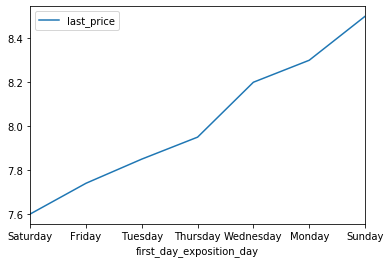

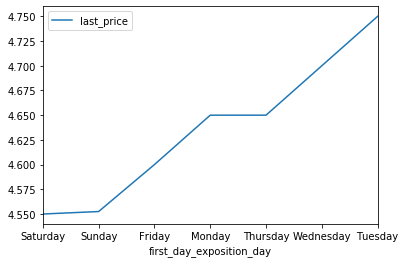

In [101]:
df_centr_area2.plot(), df2.sort_values(by='last_price').plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f56523ff590>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f56523c2bd0>)

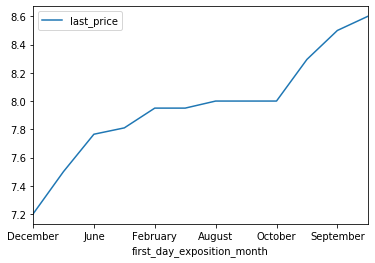

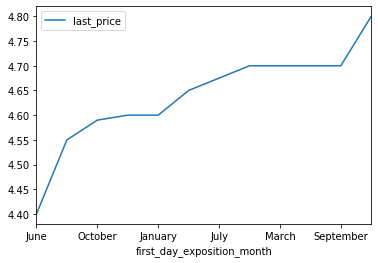

In [102]:
df_centr_area3.plot(), df3.sort_values(by='last_price').plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f56522d6790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f565229d210>)

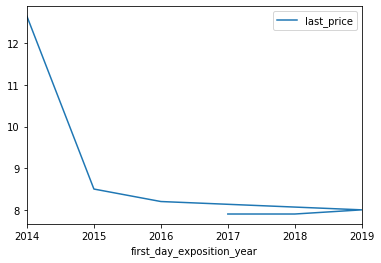

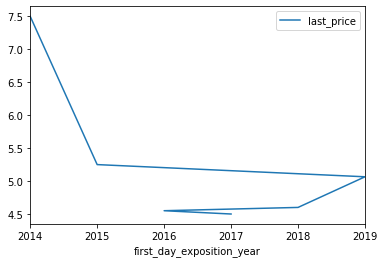

In [103]:
df_centr_area4.plot(), df4.sort_values(by='last_price').plot()

Сравнивая графики не обнаруживю значимых различий. Следовательно зависимости в центре Санкт_Петербурга схожи с зависимостями в целом по всему набору данных.

## Общий вывод

<li>Наиболее распространеные параметры продаваемых квартир: общая площадь до 70 кв.м., 1-2-3 комнатные, с высотой потолка до 2,7 м и ценой до 6,7 млн.руб.
<li><b>Самая сильная зависимость цены от общей площади.</b>
<li>Цена зависима от этажа квартиры. Самая назкая цена у квартир на первом этаже. Потом на последнем этаже. Другие этажи повышают стоимость.
<li>По дате размещения объявления вывод такой:
<li>Цена начинает повышаться с начала недели. На выходных цена самая низкая.
<li>В целом к концу года цена выше.
<li>Начиная с 2014 года цена падала до 2017 года и после начинается подъем.
<li>В этом ТОР-10 самых дорогих квартир видно, что они находятся в Зеленогорске и Санкт-Петербурге, а дешевые в Кудрово.
<li>В центральном округе Санкт-Петербурга видны такие же зависимости как и в общих данных. Цена зависит главным образом от площади квартиры и количества комнат. Средне от расстояния до центра города.</li>
<h6>Самый главный параметр, влияющий на стоимость квартиры - это её площадь.</h6>